In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14
import pgeocode
plt.style.use('ggplot')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import scipy.stats as stats
from pandas.api.types import CategoricalDtype


from pygeocoder import Geocoder
from pandas.api.types import CategoricalDtype

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from googletrans import Translator

from sklearn.preprocessing import StandardScaler

In [2]:
austin = pd.read_pickle('../pickled_data/austin_df.pickled')
sanfran = pd.read_pickle('../pickled_data/sf_all_df.pickled')
LA = pd.read_pickle('../pickled_data/LA_new_df.pickled')
chicago = pd.read_pickle('../pickled_data/chicago_trips_df.pickled')
london = pd.read_pickle('../pickled_data/london_counts_df.pickled')
DC = pd.read_pickle('../pickled_data/DC_df.pickled')
porto = pd.read_pickle('../pickled_data/porto_df.pickled')

# Total bikes - each day of the week - Austin, LA, Chicago, San Fran:

In [3]:
# austin
# sanfran
# LA
# chicago
days_of_the_week = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [4]:
total_duration_san_fran = sanfran.groupby('Day')['duration'].mean()
total_duration_austin = austin.groupby('Start_Day')['duration_minutes'].mean()
total_duration_la = LA.groupby('Day')['duration'].mean()
total_duration_chicago = chicago.groupby('Day')['tripduration'].mean()

In [5]:
total_duration_san_fran

Day
Monday        852.989031
Tuesday       812.092819
Wednesday     833.807988
Thursday      874.311851
Friday       1043.918215
Saturday     2387.528281
Sunday       2509.360094
Name: duration, dtype: float64

In [6]:
df = pd.DataFrame({'duration_san_fran': total_duration_san_fran, \
                   'duration_la': total_duration_la, 'duration_chicago':total_duration_chicago,\
                  'duration_austin':total_duration_austin})

In [7]:
df

,duration_san_fran,duration_la,duration_chicago,duration_austin
Monday,852.989031,95.220758,1259.240515,26.056339
Tuesday,812.092819,84.474610,1169.187784,23.326904
Wednesday,833.807988,101.422399,1166.374346,22.748245
Thursday,874.311851,97.881750,1196.427548,24.781651
Friday,1043.918215,102.796593,1341.399657,29.020536
Saturday,2387.528281,161.067087,1960.497706,35.332308
Sunday,2509.360094,164.951127,2092.614654,34.031979


In [8]:
list_of_index_days = df.index
df['Day'] = list_of_index_days
df

,duration_san_fran,duration_la,duration_chicago,duration_austin,Day
Monday,852.989031,95.220758,1259.240515,26.056339,Monday
Tuesday,812.092819,84.474610,1169.187784,23.326904,Tuesday
Wednesday,833.807988,101.422399,1166.374346,22.748245,Wednesday
Thursday,874.311851,97.881750,1196.427548,24.781651,Thursday
Friday,1043.918215,102.796593,1341.399657,29.020536,Friday
Saturday,2387.528281,161.067087,1960.497706,35.332308,Saturday
Sunday,2509.360094,164.951127,2092.614654,34.031979,Sunday


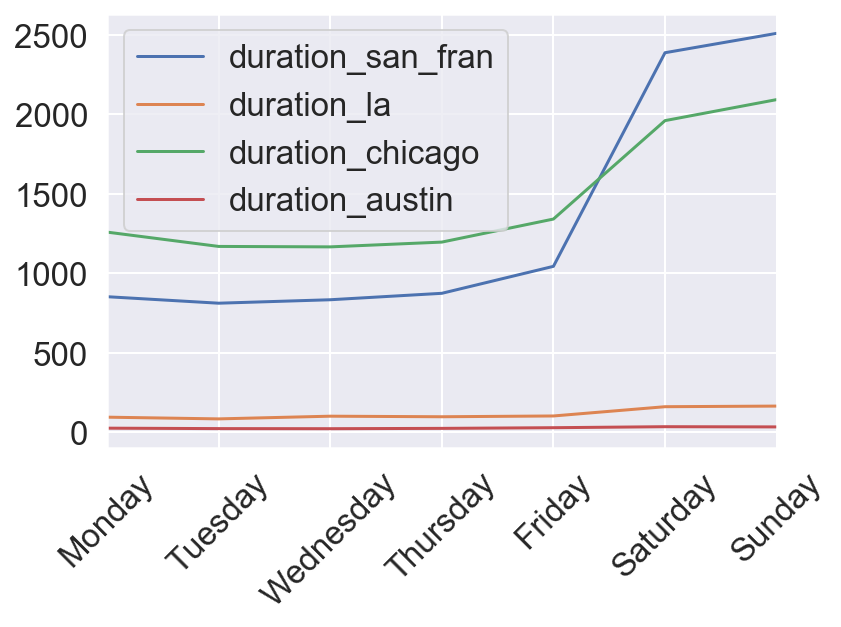

In [9]:
df.plot.line()
plt.xticks(rotation=45)
plt.show()

# ========================================

In [10]:
count_san_fran = sanfran.groupby('Day')['duration'].count()
count_austin = austin.groupby('Start_Day')['duration_minutes'].count()
count_la = LA.groupby('Day')['duration'].count()
count_chicago = chicago.groupby('Day')['tripduration'].count()

In [11]:
all_counts = pd.DataFrame({'Days':days_of_the_week, 'count_san_fran':sanfran.shape[0]/count_san_fran, \
                           'count_austin': austin.shape[0]/count_austin,\
                           'count_la':LA.shape[0]/count_la,\
                           'count_chicago':chicago.shape[0]/count_chicago})

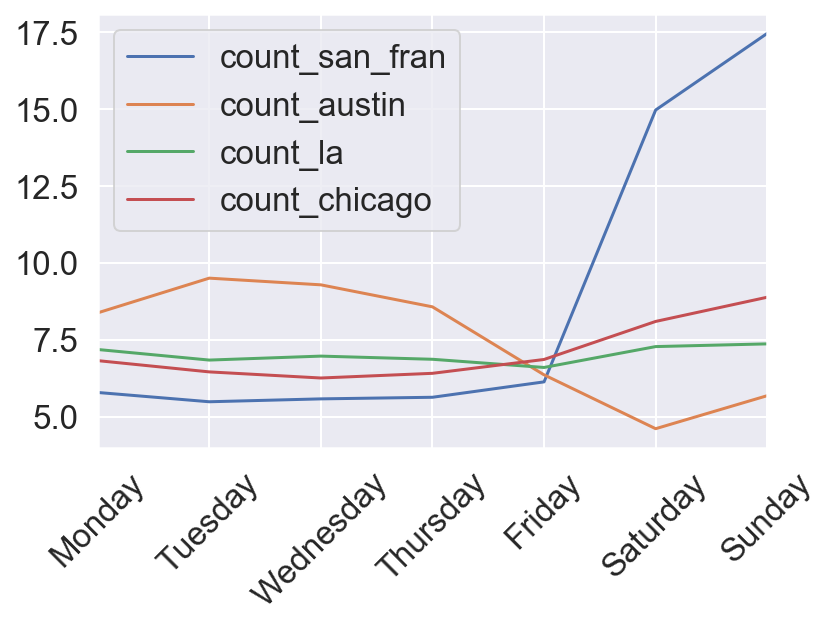

In [12]:
all_counts.plot.line()
plt.xticks(rotation=45)
plt.show()

In [13]:
scaler = StandardScaler()
all_counts_std = pd.DataFrame(scaler.fit_transform(all_counts[['count_san_fran','count_austin','count_la','count_chicago']]),\
                              columns=['count_san_fran','count_austin','count_la','count_chicago'])
all_counts_std.index = days_of_the_week

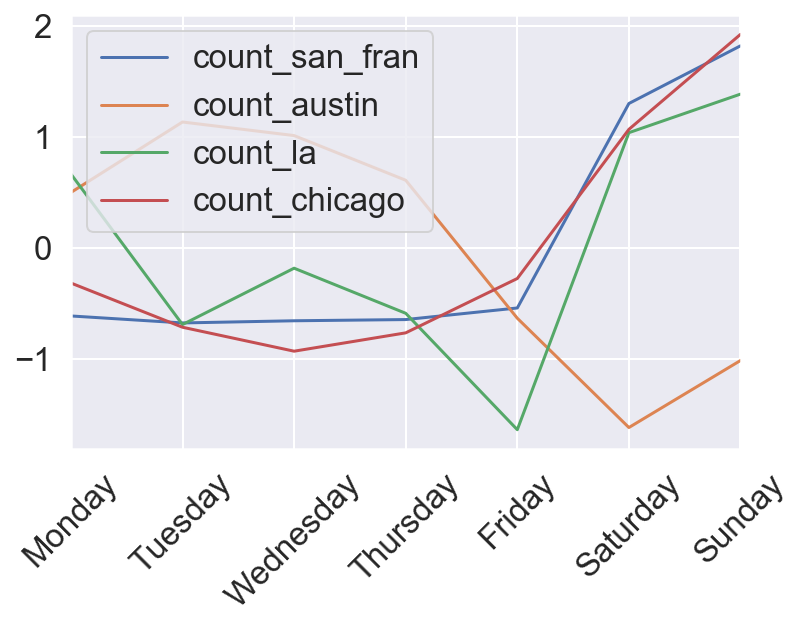

In [14]:
all_counts_std.plot.line()
plt.xticks(rotation=45)
plt.show()

# Mean duration per city:

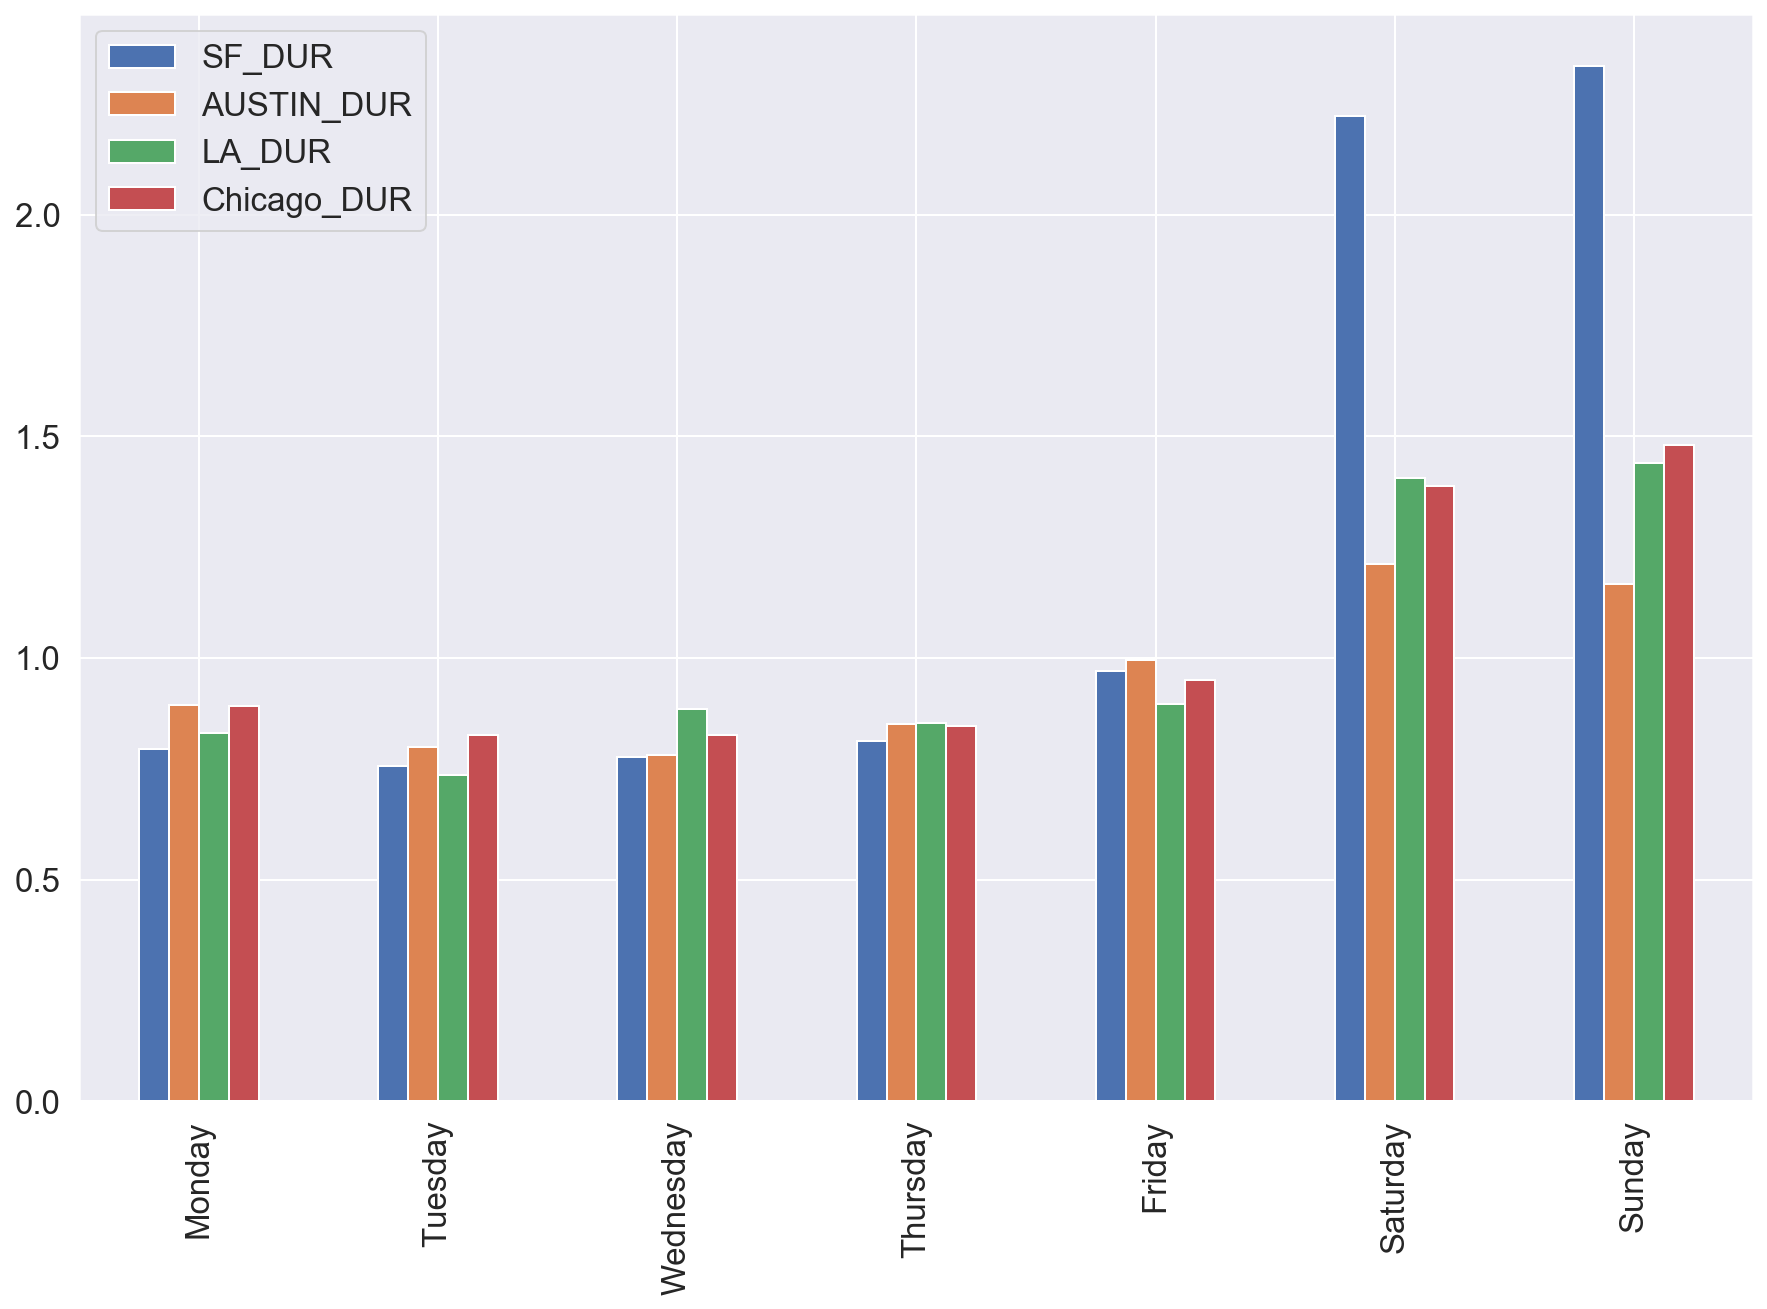

In [16]:
DF_ALL = pd.DataFrame({'SF_DUR':sanfran.groupby('Day')['duration'].mean()/sanfran['duration'].mean(),\
                       'AUSTIN_DUR':austin.groupby('Start_Day')['duration_minutes'].mean()/austin['duration_minutes'].mean(),\
                       'LA_DUR':LA.groupby('Day')['duration'].mean()/LA['duration'].mean(),\
                      'Chicago_DUR':chicago.groupby('Day')['tripduration'].mean()/chicago['tripduration'].mean()})

DF_ALL.plot.bar( figsize=(15,10));